# Feature Selection

In [140]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split

from sklearn.impute import SimpleImputer
from sklearn.feature_selection import RFECV, VarianceThreshold, SelectKBest, mutual_info_classif, SelectKBest, SequentialFeatureSelector
from sklearn.linear_model import Lasso
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, roc_curve, auc, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

In [141]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")

In [142]:
%run pre_processing2.ipynb

Missing values in Diagnosis at the Patient Level
0=Unknown
1=benign or non-malignant disease
2= malignant, primary lung cancer
3 = malignant metastatic
: 847
Missing values in Diagnosis Method
0 = unknown
1 = review of radiological images to show 2 years of stable nodule
2 = biopsy
3 = surgical resection
4 = progression or response: 847
Missing values in Primary tumor site for metastatic disease: 847
Missing values in Diagnosis Nodule 1: 865
Missing values in Diagnosis Method Nodule 1: 865
Missing values in Diagnosis Nodule 2: 954
Missing values in Diagnosis Method Nodule 2: 954
Missing values in Diagnosis Nodule 3: 966
Missing values in Diagnosis Method Nodule 3: 966
Missing values in Diagnosis Nodule 4: 966
Missing values in Diagnosis Method Nodule 4: 966
Missing values in Diagnosis Nodule 5: 966
Missing values in Diagnosis Method Nodule 5: 966
Missing values in Diagnosis at the Patient Level
0=Unknown
1=benign or non-malignant disease
2= malignant, primary lung cancer
3 = malignant 

# Recursive Feature Elimination (RFE)

In [143]:
# RFE model 

def rfe(dataframe, target_column, num_features_to_select=5):

    X = dataframe.drop(columns=[target_column])
    y = dataframe[target_column]
    
     # Create an RFE model with cross-validation and random forest classifier
    model = RandomForestClassifier()
    rfe = RFECV(model, step=1, cv=5, scoring='accuracy', min_features_to_select=num_features_to_select)
    
   
    rfe.fit(X, y)
    
    # Get the selected features
    selected_features = X.columns[rfe.support_]
    
    return selected_features



In [144]:
#data_0.5
low_rfe = rfe(low_2d_sd, 'Malignancy')
print("Selected Features:", low_rfe)

/Users/larasousa/.pyenv/versions/3.9.5/lib/python3.9/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Selected Features: Index(['Nodule_id', 'Subtlety', 'Calcification', 'Margin',
       'original_shape_Elongation', 'original_shape_MajorAxisLength',
       'original_shape_Maximum2DDiameterColumn',
       'original_shape_MinorAxisLength', 'original_shape_SurfaceArea',
       'original_shape_SurfaceVolumeRatio',
       'original_glrlm_LongRunLowGrayLevelEmphasis',
       'original_gldm_DependenceNonUniformity',
       'original_gldm_DependenceVariance',
       'original_gldm_LargeDependenceLowGrayLevelEmphasis',
       'original_gldm_SmallDependenceEmphasis',
       'original_gldm_SmallDependenceHighGrayLevelEmphasis',
       'original_gldm_SmallDependenceLowGrayLevelEmphasis',
       'Primary tumor site for metastatic disease'],
      dtype='object')


In [145]:
#data_1.0
medium_rfe = rfe(medium_2d_sd, 'Malignancy')
print("Selected Features:", medium_rfe)

/Users/larasousa/.pyenv/versions/3.9.5/lib/python3.9/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Selected Features: Index(['Nodule_id', 'Patient_id', 'Subtlety', 'Calcification', 'Margin',
       'Lobulation', 'Spiculation', 'original_shape_Elongation',
       'original_shape_MajorAxisLength',
       'original_shape_Maximum2DDiameterColumn',
       'original_shape_Maximum2DDiameterRow', 'original_shape_MinorAxisLength',
       'original_shape_Sphericity', 'original_shape_SurfaceArea',
       'original_shape_SurfaceVolumeRatio', 'original_firstorder_Energy',
       'original_firstorder_TotalEnergy', 'original_glrlm_LongRunEmphasis',
       'original_glrlm_LongRunHighGrayLevelEmphasis',
       'original_glrlm_RunLengthNonUniformity',
       'original_glrlm_ShortRunEmphasis',
       'original_gldm_DependenceNonUniformity',
       'original_gldm_DependenceVariance',
       'original_gldm_LargeDependenceEmphasis',
       'original_gldm_SmallDependenceEmphasis',
       'original_gldm_SmallDependenceHighGrayLevelEmphasis',
       'original_gldm_SmallDependenceLowGrayLevelEmphasis',
     

In [146]:
#data_1.5
high_rfe = rfe(high_2d_sd, 'Malignancy')
print("Selected Features:", high_rfe)

/Users/larasousa/.pyenv/versions/3.9.5/lib/python3.9/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Selected Features: Index(['Nodule_id', 'Patient_id', 'Subtlety', 'Calcification', 'Sphericity',
       'Margin', 'Lobulation', 'Spiculation', 'original_shape_Elongation',
       'original_shape_Flatness', 'original_shape_LeastAxisLength',
       'original_shape_MajorAxisLength',
       'original_shape_Maximum2DDiameterColumn',
       'original_shape_Maximum2DDiameterRow',
       'original_shape_Maximum2DDiameterSlice',
       'original_shape_MinorAxisLength', 'original_shape_Sphericity',
       'original_shape_SurfaceArea', 'original_shape_SurfaceVolumeRatio',
       'original_glrlm_GrayLevelNonUniformity',
       'original_glrlm_LongRunEmphasis',
       'original_glrlm_LongRunHighGrayLevelEmphasis',
       'original_glrlm_LongRunLowGrayLevelEmphasis',
       'original_glrlm_RunEntropy', 'original_glrlm_RunLengthNonUniformity',
       'original_glrlm_RunPercentage', 'original_glrlm_RunVariance',
       'original_glrlm_ShortRunEmphasis',
       'original_glrlm_ShortRunHighGrayLevelEmpha

# Feature Importance from Trees

In [147]:
# Create a feature selection model with random forest

def feature_select_trees(threshold, dataframe, target_column):

    X = dataframe.drop(columns=[target_column])
    y = dataframe[target_column]

    model = RandomForestClassifier(random_state=42)
    model.fit(X, y)
    
    # Get the feature importances
    feature_importances = model.feature_importances_
    selected_features = X.columns[feature_importances > threshold]

    return selected_features 



In [148]:
#data_0.5 threshold 0.01
low_tree_01 = feature_select_trees(0.01, low_2d_sd, 'Malignancy')

#data_1.0 threshold 0.01
medium_tree_01 = feature_select_trees(0.01, medium_2d_sd, 'Malignancy')

#data_1.5 threshold 0.01
high_tree_01 = feature_select_trees(0.01, high_2d_sd, 'Malignancy')

#data_0.5 threshold 0.02
low_tree_02 = feature_select_trees(0.02, low_2d_sd, 'Malignancy')

#data_1.0 threshold 0.02
medium_tree_02 = feature_select_trees(0.02, medium_2d_sd, 'Malignancy')

#data_1.5 threshold 0.02
high_tree_02 = feature_select_trees(0.02, high_2d_sd, 'Malignancy')


print("Threshold 0.01:")
print("Low 2D SD:")
print(low_tree_01)
print("Medium 2D SD:")
print(medium_tree_01)
print("High 2D SD:")
print(high_tree_01)

print()

print("Threshold 0.02:")
print("Low 2D SD:")
print(low_tree_02)
print("Medium 2D SD:")
print(medium_tree_02)
print("High 2D SD:")
print(high_tree_02)
print()


Threshold 0.01:
Low 2D SD:
Index(['Nodule_id', 'Patient_id', 'Subtlety', 'Calcification', 'Margin',
       'Lobulation', 'Spiculation', 'original_shape_Elongation',
       'original_shape_Flatness', 'original_shape_LeastAxisLength',
       'original_shape_MajorAxisLength',
       'original_shape_Maximum2DDiameterColumn',
       'original_shape_Maximum2DDiameterRow',
       'original_shape_Maximum2DDiameterSlice',
       'original_shape_MinorAxisLength', 'original_shape_Sphericity',
       'original_shape_SurfaceArea', 'original_shape_SurfaceVolumeRatio',
       'original_shape_VoxelVolume', 'original_firstorder_Energy',
       'original_firstorder_TotalEnergy',
       'original_glrlm_GrayLevelNonUniformity',
       'original_glrlm_LongRunEmphasis',
       'original_glrlm_LongRunHighGrayLevelEmphasis',
       'original_glrlm_LongRunLowGrayLevelEmphasis',
       'original_glrlm_RunEntropy', 'original_glrlm_RunLengthNonUniformity',
       'original_glrlm_RunLengthNonUniformityNormalized',

# Variance Threshold

In [149]:
# Create a Variance Threshold model 
def variance_threshold(threshold, dataframe, target_column):

    X = dataframe.drop(columns=[target_column])

    selector = VarianceThreshold(threshold=threshold)
    X_high_variance = selector.fit_transform(X)
    
    # Get the feature indices selected by the VarianceThreshold
    selected_feature_indices = selector.get_support(indices=True)
    
    # Get the names of the selected features
    selected_feature_names = X.columns[selected_feature_indices]
    
    return X_high_variance, selected_feature_names



In [150]:
#data_0.5 threshold 0.01
X_high_variance1, low_variance_threshold = variance_threshold(0.01, low_2d_sd, 'Malignancy')
#data_1.0 threshold 0.01
X_high_variance2, medium_variance_threshold = variance_threshold(0.01, medium_2d_sd, 'Malignancy')
#data_1.5 threshold 0.01
X_high_variance3, high_variance_threshold = variance_threshold(0.01, high_2d_sd, 'Malignancy')

print("Low Variance Threshold:")
print(low_variance_threshold)

print("Medium Variance Threshold:")
print(medium_variance_threshold)

print("High Variance Threshold:")
print(high_variance_threshold)


Low Variance Threshold:
Index(['Nodule_id', 'Patient_id', 'Subtlety', 'Internalstructure',
       'Calcification', 'Sphericity', 'Margin', 'Lobulation', 'Spiculation',
       'Texture', 'original_shape_Elongation', 'original_shape_Flatness',
       'original_shape_LeastAxisLength', 'original_shape_MajorAxisLength',
       'original_shape_Maximum2DDiameterColumn',
       'original_shape_Maximum2DDiameterRow',
       'original_shape_Maximum2DDiameterSlice',
       'original_shape_MinorAxisLength', 'original_shape_SurfaceArea',
       'original_shape_SurfaceVolumeRatio', 'original_shape_VoxelVolume',
       'original_firstorder_Energy', 'original_firstorder_TotalEnergy',
       'original_glrlm_GrayLevelNonUniformity',
       'original_glrlm_LongRunEmphasis',
       'original_glrlm_LongRunHighGrayLevelEmphasis',
       'original_glrlm_LongRunLowGrayLevelEmphasis',
       'original_glrlm_RunEntropy', 'original_glrlm_RunLengthNonUniformity',
       'original_glrlm_RunLengthNonUniformityNorma

# Lasso

In [151]:
#Create a Lasso model with a regularization coefficient of 0.01

def lasso(dataframe, target_column):

    X = dataframe.drop(columns=[target_column])
    y = dataframe[target_column]

    model = Lasso(alpha=0.01)
    model.fit(X, y)
    selected_features = X.columns[model.coef_ != 0]

    return selected_features



In [152]:
#data_0.5
print("Low Lasso:")
low_lasso = lasso(low_2d_sd, 'Malignancy')
print(low_lasso)

#data_1.0
print("Medium Lasso:")
medium_lasso= lasso(medium_2d_sd, 'Malignancy')
print(medium_lasso)

#data_2.0
print("High Lasso:")
high_lasso = lasso(high_2d_sd, 'Malignancy')
print(high_lasso)


Low Lasso:
Index(['Nodule_id', 'Patient_id', 'Subtlety', 'Internalstructure',
       'Calcification', 'Sphericity', 'Margin', 'Lobulation',
       'original_shape_LeastAxisLength', 'original_shape_MajorAxisLength',
       'original_shape_Maximum2DDiameterRow',
       'original_shape_Maximum2DDiameterSlice',
       'original_shape_MinorAxisLength', 'original_shape_SurfaceArea',
       'original_shape_VoxelVolume', 'original_firstorder_Energy',
       'original_firstorder_TotalEnergy',
       'original_glrlm_GrayLevelNonUniformity',
       'original_glrlm_LongRunEmphasis',
       'original_glrlm_LongRunHighGrayLevelEmphasis',
       'original_glrlm_LongRunLowGrayLevelEmphasis',
       'original_glrlm_RunLengthNonUniformity',
       'original_glszm_LargeAreaEmphasis',
       'original_glszm_LargeAreaHighGrayLevelEmphasis',
       'original_glszm_LargeAreaLowGrayLevelEmphasis',
       'original_glszm_ZoneVariance', 'original_gldm_DependenceNonUniformity',
       'original_gldm_DependenceVa

/Users/larasousa/.pyenv/versions/3.9.5/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.576e+01, tolerance: 7.444e-03
  model = cd_fast.enet_coordinate_descent(
/Users/larasousa/.pyenv/versions/3.9.5/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.576e+01, tolerance: 7.444e-03
  model = cd_fast.enet_coordinate_descent(
/Users/larasousa/.pyenv/versions/3.9.5/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features

# Choosing the best features

### Metrics

### 1. CrossValidation

#### rfe

###### Dataset sd = 0.5

In [153]:
#sd=0.5
Y = low_2d_sd['Malignancy']
X = low_2d_sd[low_rfe]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Applying StratifiedKFold for cross validation and RandomForestClassifier
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
model = RandomForestClassifier(random_state=42)

cv_scores_low_rfe = cross_val_score(model, X_train, y_train, cv=stratified_kfold, scoring='accuracy')
model.fit(X_train, y_train)

y_pred_group = model.predict(X_test)
accuracy_low_rfe = accuracy_score(y_test, y_pred_group)

cv_scores_low_rfe.mean(), accuracy_low_rfe


/Users/larasousa/.pyenv/versions/3.9.5/lib/python3.9/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


(0.6526315789473683, 0.5833333333333334)

###### Dataset sd = 1.0

In [154]:
#sd=1.0
Y = medium_2d_sd['Malignancy']
X = medium_2d_sd[medium_rfe]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Applying StratifiedKFold for cross validation and RandomForestClassifier
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
model = RandomForestClassifier(random_state=42)

cv_scores_medium_rfe = cross_val_score(model, X_train, y_train, cv=stratified_kfold, scoring='accuracy')
model.fit(X_train, y_train)

y_pred_group = model.predict(X_test)
accuracy_medium_rfe = accuracy_score(y_test, y_pred_group)

cv_scores_medium_rfe.mean(), accuracy_medium_rfe

/Users/larasousa/.pyenv/versions/3.9.5/lib/python3.9/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


(0.6421052631578947, 0.5)

###### Dataset sd=1.5


In [155]:
#sd=1.5
Y = high_2d_sd['Malignancy']
X = high_2d_sd[high_rfe]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Applying StratifiedKFold for cross validation and RandomForestClassifier
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
model = RandomForestClassifier(random_state=42)

cv_scores_high_rfe = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
model.fit(X_train, y_train)

y_pred_group = model.predict(X_test)
accuracy_high_rfe = accuracy_score(y_test, y_pred_group)

cv_scores_high_rfe.mean(), accuracy_high_rfe

/Users/larasousa/.pyenv/versions/3.9.5/lib/python3.9/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


(0.5684210526315789, 0.5)

#### tree

###### Dataset sd=0.5

In [156]:
#threshold 0.01
Y = low_2d_sd['Malignancy']
X = low_2d_sd[low_tree_01]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Applying StratifiedKFold for cross validation and RandomForestClassifier
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
model = RandomForestClassifier(random_state=42)

cv_scores_tree_low01 = cross_val_score(model, X_train, y_train, cv=stratified_kfold, scoring='accuracy')
model.fit(X_train, y_train)

y_pred_group = model.predict(X_test)
accuracy_tree_low01 = accuracy_score(y_test, y_pred_group)

cv_scores_tree_low01.mean(), accuracy_tree_low01

/Users/larasousa/.pyenv/versions/3.9.5/lib/python3.9/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


(0.6, 0.4583333333333333)

In [157]:
#threshold 0.02
Y = low_2d_sd['Malignancy']
X = low_2d_sd[low_tree_02]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Applying StratifiedKFold for cross validation and RandomForestClassifier
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
model = RandomForestClassifier(random_state=42)

cv_scores_tree_low02 = cross_val_score(model, X_train, y_train, cv=stratified_kfold, scoring='accuracy')
model.fit(X_train, y_train)

y_pred_group = model.predict(X_test)
accuracy_tree_low02 = accuracy_score(y_test, y_pred_group)

cv_scores_tree_low02.mean(), accuracy_tree_low02

/Users/larasousa/.pyenv/versions/3.9.5/lib/python3.9/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


(0.6842105263157896, 0.5833333333333334)

###### Dataset sd=1.0

In [158]:
#threshold 0.01
Y = medium_2d_sd['Malignancy']
X = medium_2d_sd[medium_tree_01]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Applying StratifiedKFold for cross validation and RandomForestClassifier
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
model = RandomForestClassifier(random_state=42)

cv_scores_tree_medium01 = cross_val_score(model, X_train, y_train, cv=stratified_kfold, scoring='accuracy')
model.fit(X_train, y_train)

y_pred_group = model.predict(X_test)
accuracy_tree_medium01 = accuracy_score(y_test, y_pred_group)

cv_scores_tree_medium01.mean(), accuracy_tree_medium01

/Users/larasousa/.pyenv/versions/3.9.5/lib/python3.9/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


(0.6, 0.4583333333333333)

In [159]:
#threshold 0.02
Y = medium_2d_sd['Malignancy']
X = medium_2d_sd[medium_tree_02]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Applying StratifiedKFold for cross validation and RandomForestClassifier
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
model = RandomForestClassifier(random_state=42)

cv_scores_tree_medium02 = cross_val_score(model, X_train, y_train, cv=stratified_kfold, scoring='accuracy')
model.fit(X_train, y_train)

y_pred_group = model.predict(X_test)
accuracy_tree_medium02 = accuracy_score(y_test, y_pred_group)

cv_scores_tree_medium02.mean(), accuracy_tree_medium02

/Users/larasousa/.pyenv/versions/3.9.5/lib/python3.9/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


(0.6842105263157896, 0.5833333333333334)

###### Dataset sd=1.5

In [160]:
#threshold 0.01
Y = high_2d_sd['Malignancy']
X = high_2d_sd[high_tree_01]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Applying StratifiedKFold for cross validation and RandomForestClassifier
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
model = RandomForestClassifier(random_state=42)

cv_scores_tree_high01 = cross_val_score(model, X_train, y_train, cv=stratified_kfold, scoring='accuracy')
model.fit(X_train, y_train)

y_pred_group = model.predict(X_test)
accuracy_tree_high01 = accuracy_score(y_test, y_pred_group)

cv_scores_tree_high01.mean(), accuracy_tree_high01 

/Users/larasousa/.pyenv/versions/3.9.5/lib/python3.9/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


(0.6, 0.4583333333333333)

In [161]:
#threshold 0.01
Y = high_2d_sd['Malignancy']
X = high_2d_sd[high_tree_02]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Applying StratifiedKFold for cross validation and RandomForestClassifier
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
model = RandomForestClassifier(random_state=42)

cv_scores_tree_high02 = cross_val_score(model, X_train, y_train, cv=stratified_kfold, scoring='accuracy')
model.fit(X_train, y_train)

y_pred_group = model.predict(X_test)
accuracy_tree_high02 = accuracy_score(y_test, y_pred_group)

cv_scores_tree_high02.mean(), accuracy_tree_high02 

/Users/larasousa/.pyenv/versions/3.9.5/lib/python3.9/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


(0.6842105263157896, 0.5833333333333334)

#### Variance threshold

###### Dataset sd=0.5

In [162]:
#sd=0.5
Y = low_2d_sd['Malignancy']
X = low_2d_sd[low_variance_threshold]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Applying StratifiedKFold for cross validation and RandomForestClassifier
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
model = RandomForestClassifier(random_state=42)

cv_scores_low_vt = cross_val_score(model, X_train, y_train, cv=stratified_kfold, scoring='accuracy')
model.fit(X_train, y_train)

y_pred_group = model.predict(X_test)
accuracy_low_vt = accuracy_score(y_test, y_pred_group)

cv_scores_low_vt.mean(), accuracy_low_vt

/Users/larasousa/.pyenv/versions/3.9.5/lib/python3.9/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


(0.5894736842105263, 0.5833333333333334)

###### Dataset sd=1.0

In [163]:
#sd=1.0
Y = medium_2d_sd['Malignancy']
X = medium_2d_sd[medium_variance_threshold]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Applying StratifiedKFold for cross validation and RandomForestClassifier
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
model = RandomForestClassifier(random_state=42)

cv_scores_medium_vt = cross_val_score(model, X_train, y_train, cv=stratified_kfold, scoring='accuracy')
model.fit(X_train, y_train)

y_pred_group = model.predict(X_test)
accuracy_medium_vt = accuracy_score(y_test, y_pred_group)

cv_scores_medium_vt.mean(), accuracy_medium_vt 

/Users/larasousa/.pyenv/versions/3.9.5/lib/python3.9/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


(0.5894736842105263, 0.5833333333333334)

###### Dataset sd=1.5

In [164]:
#sd=1.5
Y = high_2d_sd['Malignancy']
X = high_2d_sd[high_variance_threshold]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Applying StratifiedKFold for cross validation and RandomForestClassifier
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
model = RandomForestClassifier(random_state=42)

cv_scores_high_vt = cross_val_score(model, X_train, y_train, cv=stratified_kfold, scoring='accuracy')
model.fit(X_train, y_train)

y_pred_group = model.predict(X_test)
accuracy_high_vt = accuracy_score(y_test, y_pred_group)

cv_scores_high_vt.mean(), accuracy_high_vt 

/Users/larasousa/.pyenv/versions/3.9.5/lib/python3.9/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


(0.5894736842105263, 0.5833333333333334)

#### Lasso

###### Dataset sd=0.5

In [165]:
#sd = 0.5
Y = low_2d_sd['Malignancy']
X = low_2d_sd[low_lasso]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Applying StratifiedKFold for cross validation and RandomForestClassifier
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
model = RandomForestClassifier(random_state=42)

cv_scores_low_lasso = cross_val_score(model, X_train, y_train, cv=stratified_kfold, scoring='accuracy')
model.fit(X_train, y_train)

y_pred_group = model.predict(X_test)
accuracy_low_lasso = accuracy_score(y_test, y_pred_group)

cv_scores_low_lasso.mean(), accuracy_low_lasso

/Users/larasousa/.pyenv/versions/3.9.5/lib/python3.9/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


(0.6421052631578947, 0.5)

###### Dataset sd=1.0

In [166]:
#sd=1.0
Y = medium_2d_sd['Malignancy']
X = medium_2d_sd[medium_lasso]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Applying StratifiedKFold for cross validation and RandomForestClassifier
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
model = RandomForestClassifier(random_state=42)
cv_scores_medium_lasso = cross_val_score(model, X_train, y_train, cv=stratified_kfold, scoring='accuracy')
model.fit(X_train, y_train)
y_pred_group = model.predict(X_test)
accuracy_medium_lasso = accuracy_score(y_test, y_pred_group)

cv_scores_medium_lasso .mean(), accuracy_medium_lasso

/Users/larasousa/.pyenv/versions/3.9.5/lib/python3.9/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


(0.6421052631578947, 0.5)

###### Dataset sd=1.5

In [167]:
#sd=1.5
Y = high_2d_sd['Malignancy']
X = high_2d_sd[high_lasso]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Applying StratifiedKFold for cross validation and RandomForestClassifier
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
model = RandomForestClassifier(random_state=42)

cv_scores_high_lasso = cross_val_score(model, X, Y, cv=stratified_kfold, scoring='accuracy')

model.fit(X_train, y_train)
y_pred_group = model.predict(X_test)
accuracy_high_lasso = accuracy_score(y_test, y_pred_group)

cv_scores_high_lasso.mean(), accuracy_high_lasso

/Users/larasousa/.pyenv/versions/3.9.5/lib/python3.9/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


(0.6463768115942029, 0.5)

## Cross-Validation Score Comparison

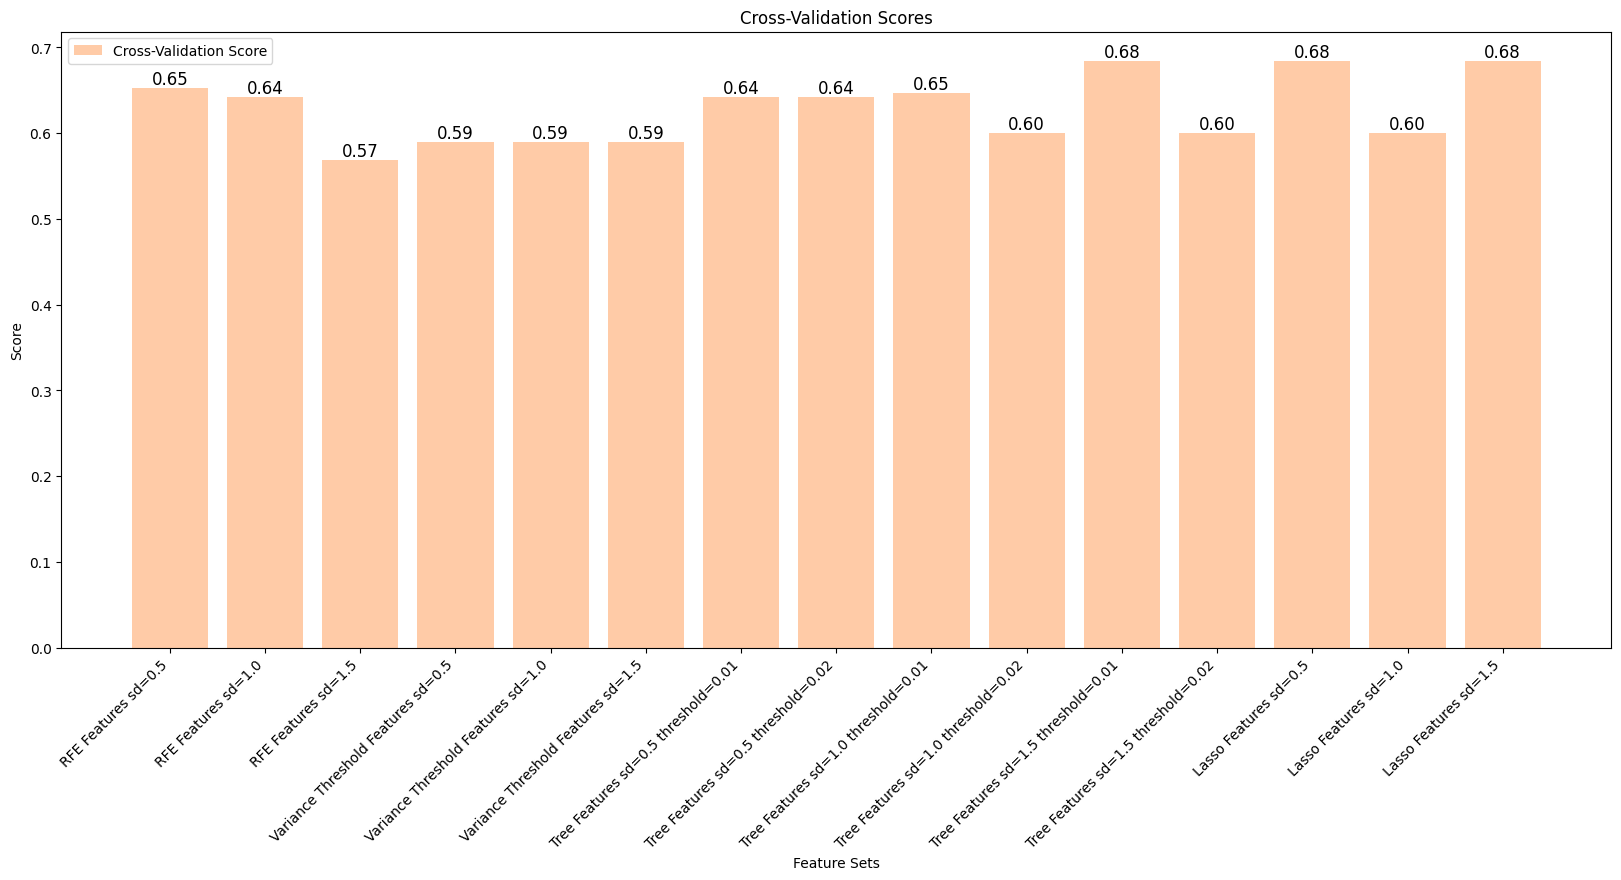

In [168]:

feature_sets = ["RFE Features sd=0.5", "RFE Features sd=1.0", "RFE Features sd=1.5", 
                "Variance Threshold Features sd=0.5", "Variance Threshold Features sd=1.0",
                  "Variance Threshold Features sd=1.5", "Tree Features sd=0.5 threshold=0.01", 
                  "Tree Features sd=0.5 threshold=0.02", 
                  "Tree Features sd=1.0 threshold=0.01", "Tree Features sd=1.0 threshold=0.02",
                    "Tree Features sd=1.5 threshold=0.01", "Tree Features sd=1.5 threshold=0.02",
                    "Lasso Features sd=0.5", "Lasso Features sd=1.0", "Lasso Features sd=1.5"]

# List of cross-validation scores corresponding to each feature set
cross_val_scores = [cv_scores_low_rfe,cv_scores_medium_rfe, cv_scores_high_rfe, 
                    cv_scores_low_vt, cv_scores_medium_vt, cv_scores_high_vt, cv_scores_low_lasso, 
                    cv_scores_medium_lasso, cv_scores_high_lasso, cv_scores_tree_low01,
                      cv_scores_tree_low02, cv_scores_tree_medium01, cv_scores_tree_medium02,
                        cv_scores_tree_high01, cv_scores_tree_high02]

# Create a bar chart for cross-validation scores
plt.figure(figsize=(20, 8))
bars = plt.bar(feature_sets, [score.mean() for score in cross_val_scores], color='#FF7F24', alpha=0.4, label='Cross-Validation Score')
plt.xlabel('Feature Sets')
plt.ylabel('Score')
plt.xticks(rotation=45, ha="right")  
plt.legend(loc='best')
plt.title('Cross-Validation Scores')

for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{bar.get_height():.2f}', ha='center', va='bottom', fontsize=12, color='black')

